In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv('ResumeDataSet.csv', encoding='utf8')
df['New_Resume'] = ''

In [4]:
df.head(2)

,Category,Resume,New_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,


In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Operations Manager           40
Sales                        40
ETL Developer                40
Blockchain                   40
Mechanical Engineer          40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    962 non-null    object
 1   Resume      962 non-null    object
 2   New_Resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [8]:
from matplotlib.gridspec import GridSpec

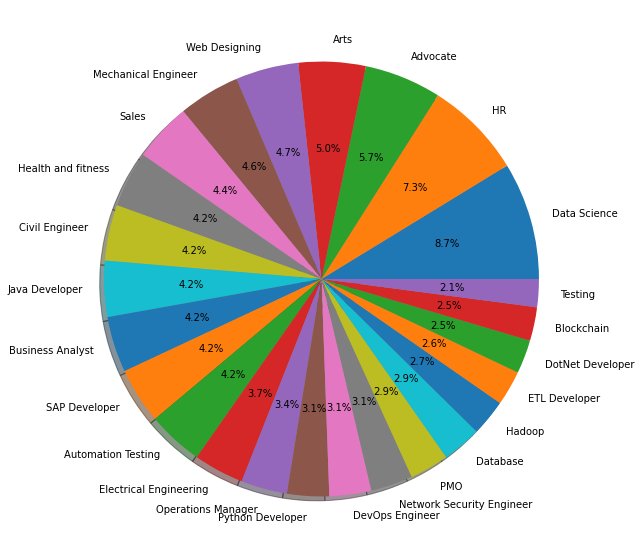

In [9]:
target = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(10,10))
grid = GridSpec(2,2)
pieImg = plt.pie(target,labels= labels, autopct='%1.1f%%', shadow=True)
plt.show()

In [10]:
import re

In [11]:
def preprocess(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ',text)  # remove extra whitespace
    return text
    
df['New_Resume'] = df.Resume.apply(lambda x: preprocess(x))

In [12]:
df.head()

,Category,Resume,New_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df['New_Resume']
y = df['Category']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
model = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
prediction = model.predict(X_test)

In [21]:
print(classification_report(y_test, prediction))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00        17
       Automation Testing       1.00      1.00      1.00         9
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         4
             Data Science       1.00      1.00      1.00        13
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      1.00      1.00        10
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        19
   Electrical Engineering       1.00      1.00      1.00         5
                       HR       1.00      1.00      1.00         7
                   Hadoop       1.00      1.00      1.00     

In [30]:
new_pred = model.predict([preprocess('i know pytorch and tensorflow with some machine learning algorithm i built an AI model')])

In [31]:
new_pred

array(['Data Science'], dtype=object)

In [33]:
import pickle
pickle.dump(model, open('ResumeS.pkl', 'wb'))

In [35]:
ml = pickle.load(open("ResumeS.pkl",'rb'))

In [36]:
ml.predict([preprocess('i know pytorch and tensorflow with some machine learning algorithm i built an AI model')])

array(['Data Science'], dtype=object)

# job description matcher

In [32]:
import docx2txt

In [38]:
resume = docx2txt.process('test.docx')

In [40]:
print(resume)

Swarup Karmokar



Berhampore, West Bengal, Pin:742102

+91 7718277802 | swarupkarmokar123@gmail.com | Swarup Karmokar | LinkedIn(https://www.linkedin.com/in/swarup-karmokar-68521816b/)





TECHNICAL SKILLS:

		Machine Learning Classification, Regression, NLP.

		Deep Learning ANN, CNN.

		Programming Language Python(scikit-learn, numpy, pandas, matplotlib, seaborn), C language, SQL, Computer Vision.

		Deep Learning Library PyTorch

		PlatformWindows

		Version-Control SystemGitHub, Bitbucket.

WORK EXPERIENCE:

Data Analyst at Sreejan Livelihood Development. Mainly we Cross check the data using Data Preprocessing .

Intern at Tachyon AI.(Present): working with machine learning models….



PROJECTS:

Some of my recent project are:

Car Brand Prediction using Pytorch CNN model.. link: SwarupKarmokar/CAR_Brand_with-pytorch (github.com)

NYC taxi fare prediction Classification and Regression… link: ANN_model/NYC-taxi-fare at main · SwarupKarmokar/ANN_model (github.com)

Email sender bot

In [42]:
job_des = docx2txt.process('test.docx')

In [43]:
text = [resume, job_des]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

count_mat = cv.fit_transform(text)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
# print(f"similarity score:\n {cosine_similarity(count_mat)}")

In [53]:
match_per = cosine_similarity(count_mat)[0][1] * 100
print(f"The Resume matches {round(match_per,2)}% of the Job description")

The Resume matches 100.0% of the Job description


# Contact the Person

In [55]:
import re

In [100]:
pattern = r'\d{2} \d{10}'

In [103]:
resume = docx2txt.process('test.docx')
resume = preprocess(resume)
matches = re.findall(pattern, resume)

matches

['91 7718277802']